DATA AUGMENTATION

**A. Target**
1. Move your last code's transformations to Albumentations. Apply ToTensor,     HorizontalFlip, Normalize (at min) + More (for additional points)
2. Please make sure that your test_transforms are simple and only using ToTensor and Normalize
3. Implement GradCam function as a module. 
4. Your final code (notebook file) must use imported functions to implement transformations and GradCam functionality
5. Target Accuracy is 87%

**B. Results**
1. Parameters: 11,173,962
2. Best Training Accuracy in 25 epochs: 95.87%
3. Best Test Accuracy in 25 epochs: 87.66 %
4. Total RF reached: 76*76 at the end of Conv block 4

**C. Analysis**

I have implemented Albumentations transforms for normalization ( by finding norm and std values for entire dataset ), Horizontal flip, Vertical flip, Rotations. This acts as a regularizer and now the model is not overfitting as earlier.


In [1]:
import torch
import torch.optim as optim

from torchsummary import summary
from torch.optim.lr_scheduler import StepLR

import albumentations as A
from   torch.utils.data import Dataset

In [17]:
!git clone https://github.com/SachinDangayach/TSAI_EVA5.git
# import sys

fatal: destination path 'TSAI_EVA5' already exists and is not an empty directory.


In [3]:
# sys.path
# sys.path.append(r'C:\Users\sdangayach162437\Desktop')

In [18]:
# from eva5_copy.dataset import session9_dataset as dataset
# from eva5_copy.models import session8_resnet18_model as models
# from eva5_copy.models import session8_train_model as train
# from eva5_copy.models import session8_test_model as test
# from eva5_copy.utils import session7_utils as utils

from TSAI_EVA5.session9.dataset import session9_dataset as dataset
from TSAI_EVA5.session9.models import session8_resnet18_model as models
from TSAI_EVA5.session9.models import session8_train_model as train
from TSAI_EVA5.session9.models import session8_test_model as test
from TSAI_EVA5.session9.utils import session9_utils as utils

## Extract, Load and Transform Data

In [5]:
# Calculate Ture Mean and STD
norm_mean,norm_std = dataset.cifar10_mean_std() #  (0.49, 0.48, 0.45), (0.25, 0.24, 0.26)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
# Extract Datasets
train_set,test_set = dataset.get_datasets()
# Targets -> ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
classes = train_set.classes

Files already downloaded and verified
Files already downloaded and verified


In [7]:
# Get train and test transform
train_transform, test_transform = dataset.get_album_transforms(norm_mean,norm_std)

In [8]:
# transform the data
train_set,test_set = dataset.trasnform_datasets(train_set, test_set, train_transform, test_transform)

# Dataloader Arguments & Test/Train Dataloaders - Load part of ETL
train_loader,test_loader = dataset.get_dataloaders(train_set,test_set)

CUDA Available? True


### Data Exploration

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Displaying 10 images


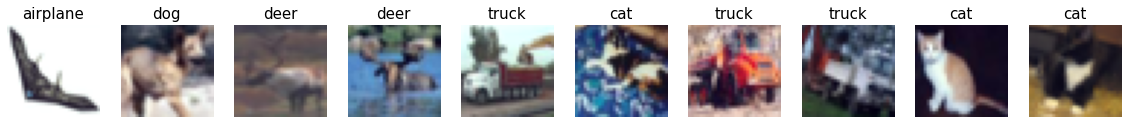

In [9]:
# Explore sample images
utils.show_sample_images(train_loader, classes, .5, .25, num_of_images = 10)

## Import Model and show model summary

In [10]:
# Model summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = models.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

## Train and Test Model

In [11]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=20, gamma=0.1)

EPOCHS = 25
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train.train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
    scheduler.step()
    test.test(model, device, test_loader, test_losses, test_acc)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.597468614578247 Batch_id=390 Train Accuracy=32.26: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.5055, Test Accuracy: 4237/10000 (42.37%)

EPOCH: 1


Loss=1.3637771606445312 Batch_id=390 Train Accuracy=48.47: 100%|██████████| 391/391 [00:57<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.3066, Test Accuracy: 5261/10000 (52.61%)

EPOCH: 2


Loss=1.1243635416030884 Batch_id=390 Train Accuracy=57.08: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0006, Test Accuracy: 6382/10000 (63.82%)

EPOCH: 3


Loss=0.8768435716629028 Batch_id=390 Train Accuracy=64.46: 100%|██████████| 391/391 [00:57<00:00,  6.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8989, Test Accuracy: 6819/10000 (68.19%)

EPOCH: 4


Loss=0.706582248210907 Batch_id=390 Train Accuracy=68.66: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7684, Test Accuracy: 7343/10000 (73.43%)

EPOCH: 5


Loss=0.7939738035202026 Batch_id=390 Train Accuracy=72.11: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7486, Test Accuracy: 7421/10000 (74.21%)

EPOCH: 6


Loss=0.6064652800559998 Batch_id=390 Train Accuracy=75.27: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6987, Test Accuracy: 7537/10000 (75.37%)

EPOCH: 7


Loss=0.7503374814987183 Batch_id=390 Train Accuracy=77.69: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6296, Test Accuracy: 7796/10000 (77.96%)

EPOCH: 8


Loss=0.6713917851448059 Batch_id=390 Train Accuracy=79.85: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6813, Test Accuracy: 7740/10000 (77.40%)

EPOCH: 9


Loss=0.6945304870605469 Batch_id=390 Train Accuracy=81.60: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6656, Test Accuracy: 7774/10000 (77.74%)

EPOCH: 10


Loss=0.4771758019924164 Batch_id=390 Train Accuracy=83.29: 100%|██████████| 391/391 [00:57<00:00,  6.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5341, Test Accuracy: 8170/10000 (81.70%)

EPOCH: 11


Loss=0.4319136142730713 Batch_id=390 Train Accuracy=84.47: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5513, Test Accuracy: 8171/10000 (81.71%)

EPOCH: 12


Loss=0.6035682559013367 Batch_id=390 Train Accuracy=85.89: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5158, Test Accuracy: 8309/10000 (83.09%)

EPOCH: 13


Loss=0.41120776534080505 Batch_id=390 Train Accuracy=86.80: 100%|██████████| 391/391 [00:57<00:00,  6.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5322, Test Accuracy: 8278/10000 (82.78%)

EPOCH: 14


Loss=0.22376640141010284 Batch_id=390 Train Accuracy=87.72: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4911, Test Accuracy: 8400/10000 (84.00%)

EPOCH: 15


Loss=0.28242942690849304 Batch_id=390 Train Accuracy=88.64: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4890, Test Accuracy: 8401/10000 (84.01%)

EPOCH: 16


Loss=0.2795375883579254 Batch_id=390 Train Accuracy=89.63: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4799, Test Accuracy: 8493/10000 (84.93%)

EPOCH: 17


Loss=0.3374926447868347 Batch_id=390 Train Accuracy=90.26: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5338, Test Accuracy: 8374/10000 (83.74%)

EPOCH: 18


Loss=0.279325932264328 Batch_id=390 Train Accuracy=91.00: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5124, Test Accuracy: 8393/10000 (83.93%)

EPOCH: 19


Loss=0.2945218086242676 Batch_id=390 Train Accuracy=91.38: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4655, Test Accuracy: 8537/10000 (85.37%)

EPOCH: 20


Loss=0.1579696238040924 Batch_id=390 Train Accuracy=94.40: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4216, Test Accuracy: 8726/10000 (87.26%)

EPOCH: 21


Loss=0.13889482617378235 Batch_id=390 Train Accuracy=95.11: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4247, Test Accuracy: 8753/10000 (87.53%)

EPOCH: 22


Loss=0.20237119495868683 Batch_id=390 Train Accuracy=95.56: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4384, Test Accuracy: 8737/10000 (87.37%)

EPOCH: 23


Loss=0.12597636878490448 Batch_id=390 Train Accuracy=95.66: 100%|██████████| 391/391 [00:57<00:00,  6.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4289, Test Accuracy: 8752/10000 (87.52%)

EPOCH: 24


Loss=0.17109613120555878 Batch_id=390 Train Accuracy=95.87: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s]



Test set: Average loss: 0.4257, Test Accuracy: 8766/10000 (87.66%)



#  Validation accuracies and Loss change curves

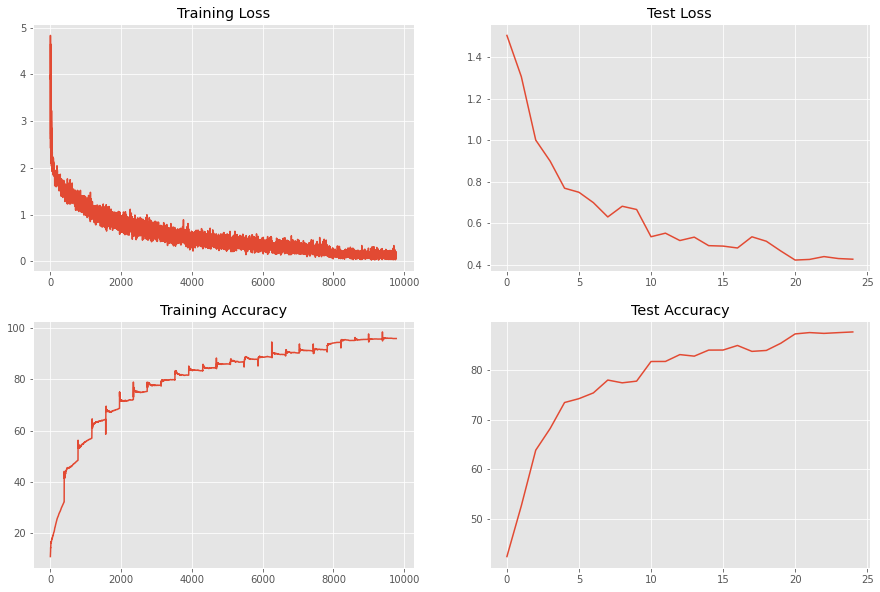

In [12]:
utils.valid_accuracy_loss_plots(train_losses, train_acc, test_losses, test_acc)

## Display misclassified images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


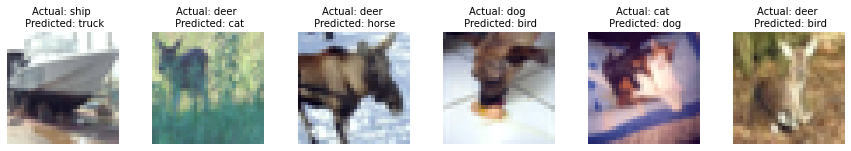

In [13]:
utils.show_misclassified_images(model, classes, test_loader, num_of_images = 5)

# Grad Cam Implementation

In [20]:
grad_cam = utils.GradCam(model=model, feature_module=model.layer4, \
                    target_layer_names=["2"], use_cuda=torch.cuda.is_available())

img = image
img = np.float32(cv2.resize(img, (224, 224))) / 255
input = preprocess_image(img)

# If None, returns the map for the highest scoring category.
# Otherwise, targets the requested index.
target_index = None
# mask = grad_cam(input, target_index)

utils.show_cam_on_image(img, mask)